In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
# import pandas_datareader
style.use('ggplot')

In [2]:
# start = dt.datetime(2000, 1,1)
# end = dt.datetime(2017,12,1)

In [11]:
#df = web.DataReader('TSLA', 'yahoo',start,end)
#df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [13]:
#df.to_csv('tesla.csv')

In [18]:
df = pd.read_csv('tesla.csv', index_col =0, parse_dates = True)

In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


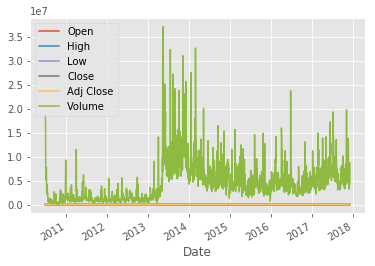

In [23]:
df.plot()


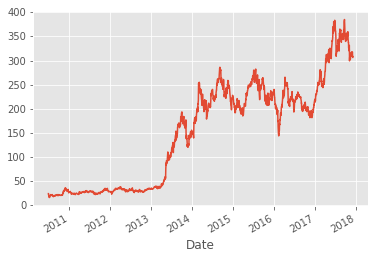

In [26]:
df['Adj Close'].plot()

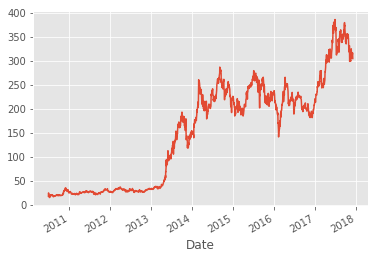

In [27]:
df['Open'].plot()

In [34]:
#to get 100 moving average and add that column
df['100ma'] = df['Adj Close'].rolling(window = 100).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2011-04-11,26.469999,26.530001,25.020000,25.270000,25.270000,1369400,NaN
2011-04-12,25.080000,25.209999,24.299999,24.650000,24.650000,1357400,NaN
2011-04-13,25.129999,25.690001,24.809999,24.930000,24.930000,1211500,NaN
2011-04-14,24.870001,25.280001,24.200001,25.139999,25.139999,983400,NaN
2011-04-15,25.650000,26.180000,25.410000,25.580000,25.580000,943500,NaN


In [33]:

# #We can either drop Na values
# df.dropna(inplace = True)
# df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2011-04-11,26.469999,26.530001,25.020000,25.270000,25.270000,1369400,26.5132
2011-04-12,25.080000,25.209999,24.299999,24.650000,24.650000,1357400,26.4648
2011-04-13,25.129999,25.690001,24.809999,24.930000,24.930000,1211500,26.4152
2011-04-14,24.870001,25.280001,24.200001,25.139999,25.139999,983400,26.3567
2011-04-15,25.650000,26.180000,25.410000,25.580000,25.580000,943500,26.2785


In [36]:
#or we can just put same values in place i.e. same values till 99 as Adj close
df['100ma'] = df['Adj Close'].rolling(window = 100, min_periods = 0).mean()
df.head()


,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2011-04-11,26.469999,26.530001,25.020000,25.270000,25.270000,1369400,25.2700
2011-04-12,25.080000,25.209999,24.299999,24.650000,24.650000,1357400,24.9600
2011-04-13,25.129999,25.690001,24.809999,24.930000,24.930000,1211500,24.9500
2011-04-14,24.870001,25.280001,24.200001,25.139999,25.139999,983400,24.9975
2011-04-15,25.650000,26.180000,25.410000,25.580000,25.580000,943500,25.1140


In [37]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2017-11-27,313.250000,317.339996,309.510010,316.809998,316.809998,4555900,339.779499
2017-11-28,316.359985,320.000000,313.920013,317.549988,317.549988,4949500,339.822799
2017-11-29,317.299988,318.000000,301.230011,307.540009,307.540009,8767400,339.737699
2017-11-30,308.559998,310.700012,304.540009,308.850006,308.850006,4351600,339.553999
2017-12-01,305.440002,310.320007,305.049988,306.529999,306.529999,4292900,339.324099


Making graph with two subplot

<Container object of 1674 artists>

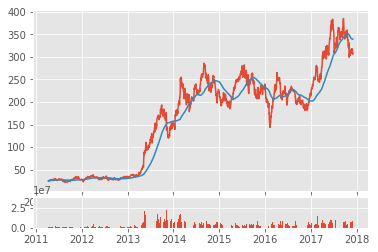

In [38]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1)
ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])


#To move both grids together i.e zooming together we can add a parameter


<Container object of 1674 artists>

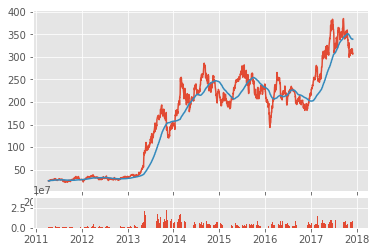

In [39]:

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=5,colspan=1,sharex =ax1)

ax1.plot(df.index,df['Adj Close'])
ax1.plot(df.index,df['100ma'])
ax2.bar(df.index,df['Volume'])
